In [1]:
!pip install -r requirements.txt

In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import xgboost as xgb

### load data

For xgboost model, we need to make lag features explicitly, here we use 1 and 7 lags for each feature.

In [3]:
data=pd.read_csv('input/data.csv', index_col=0, parse_dates=[0])
print(data.shape)
data.head()

(427, 12)


,total_purchase_amt,total_redeem_amt,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
date,,,,,,,,,,,,
2013-07-01,0.165344,0.036072,4.456,5.423,6.040,6.8800,5.295,4.2390,4.2820,4.4125,1.5787,6.307
2013-07-02,0.147781,0.016678,3.786,4.750,5.074,5.8000,5.211,4.2344,4.2808,4.4070,1.5461,6.174
2013-07-03,0.138790,0.038872,3.400,4.242,4.658,5.2000,5.148,4.2300,4.2796,4.4022,1.4670,6.034
2013-07-04,0.093242,0.041854,3.348,3.938,4.464,5.1020,5.029,4.2287,4.2776,4.4000,1.4223,5.903
2013-07-05,0.059284,0.018043,3.380,3.816,4.295,4.7885,4.939,4.2273,4.2749,4.4000,1.3845,5.739


In [4]:
def process(df,lags=[1]):
    ret=df[['total_purchase_amt']]
    for lag in lags:
        lagdf = df.shift(lag)
        lagdf.columns=[f'lag{lag}_' + str(col) for col in lagdf.columns]
        ret=pd.concat([ret, lagdf], axis=1)
    return ret.fillna(0) 
data=process(data, lags=[1,7])
train=data.iloc[:-30 ] 
test=data.iloc[-30: ] 
print(train.shape, test.shape)


(397, 25) (30, 25)


In [5]:
train.head()

,total_purchase_amt,lag1_total_purchase_amt,lag1_total_redeem_amt,lag1_Interest_O_N,lag1_Interest_1_W,lag1_Interest_2_W,lag1_Interest_1_M,lag1_Interest_3_M,lag1_Interest_6_M,lag1_Interest_9_M,...,lag7_Interest_O_N,lag7_Interest_1_W,lag7_Interest_2_W,lag7_Interest_1_M,lag7_Interest_3_M,lag7_Interest_6_M,lag7_Interest_9_M,lag7_Interest_1_Y,lag7_mfd_daily_yield,lag7_mfd_7daily_yield
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.165344,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-02,0.147781,0.165344,0.036072,4.456,5.423,6.040,6.880,5.295,4.2390,4.2820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-03,0.138790,0.147781,0.016678,3.786,4.750,5.074,5.800,5.211,4.2344,4.2808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-04,0.093242,0.138790,0.038872,3.400,4.242,4.658,5.200,5.148,4.2300,4.2796,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-07-05,0.059284,0.093242,0.041854,3.348,3.938,4.464,5.102,5.029,4.2287,4.2776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# train

Usually xgboost needs more tunning and feature engineering, but here we just make a simple training.

In [6]:
model = xgb.XGBRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, n_jobs=-1, random_state=0)
model.fit(train.drop('total_purchase_amt', axis=1), train['total_purchase_amt']);


/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

### results

Seems results of this simple training is not bad as expected.

In [7]:
train_pred=pd.DataFrame(model.predict(train.drop('total_purchase_amt', axis=1)), columns=['yhat'], index=train.index)
train_pred.head()

/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

,yhat
date,
2013-07-01,0.216852
2013-07-02,0.130928
2013-07-03,0.130928
2013-07-04,0.123233
2013-07-05,0.123660


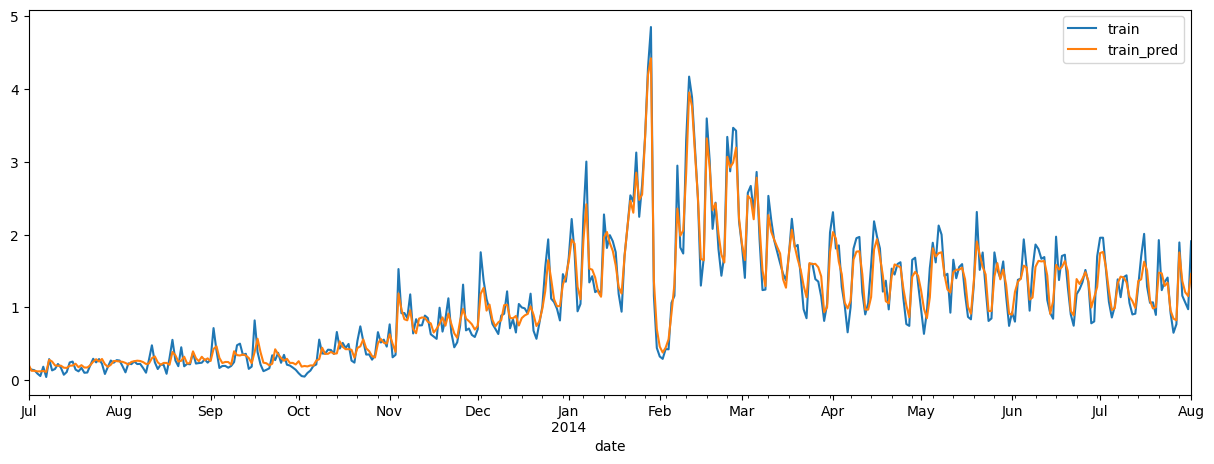

In [8]:
pd.concat([train['total_purchase_amt'],train_pred['yhat']], axis=1).plot(figsize=(15,5)) 
plt.legend(['train', 'train_pred'])

/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/home/bo/mydev/purchase_redemption/.conda/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isi

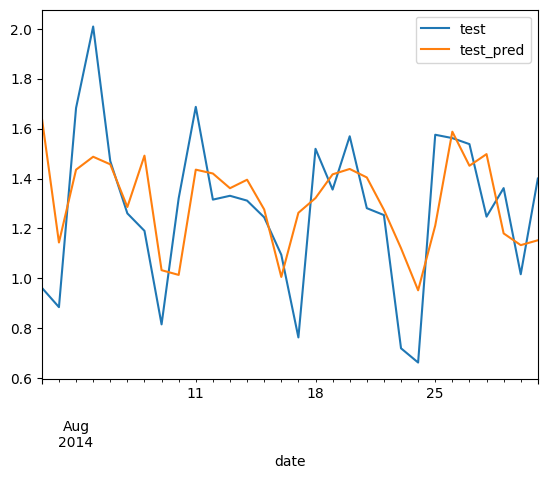

In [9]:
test_pred=pd.DataFrame(model.predict(test.drop('total_purchase_amt', axis=1)), columns=['yhat'], index=test.index)
pd.concat([test['total_purchase_amt'],test_pred['yhat']], axis=1).plot( )
plt.legend(['test', 'test_pred'])